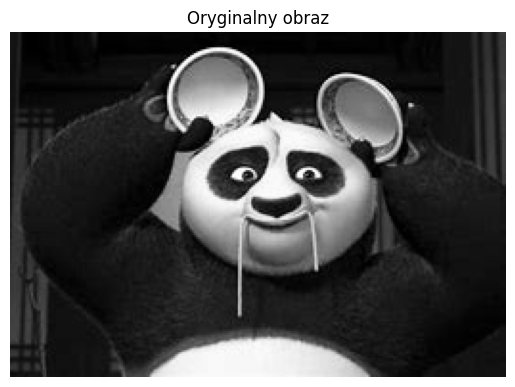

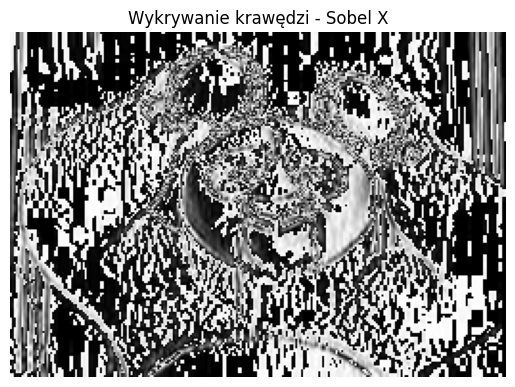

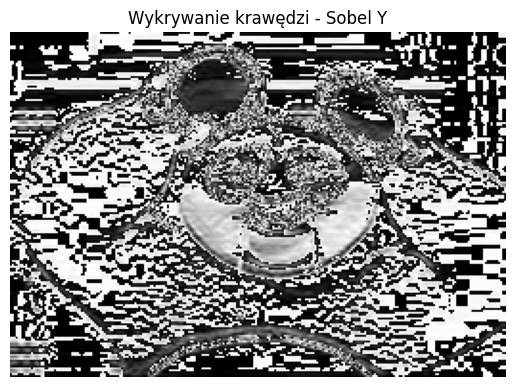

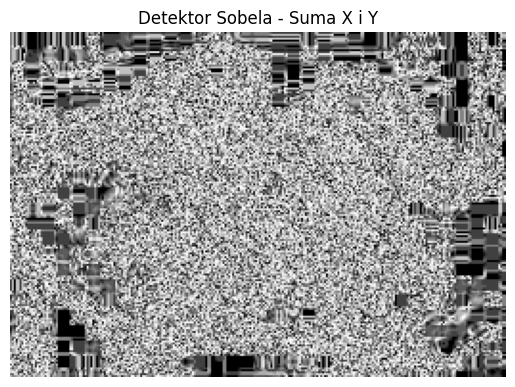

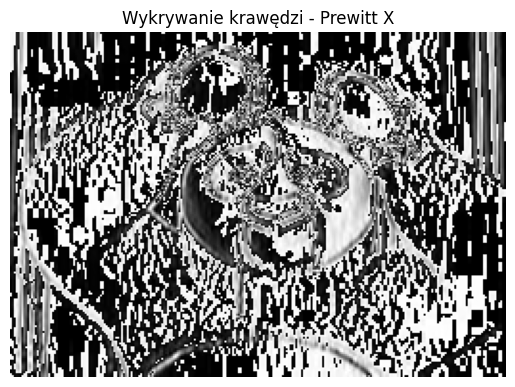

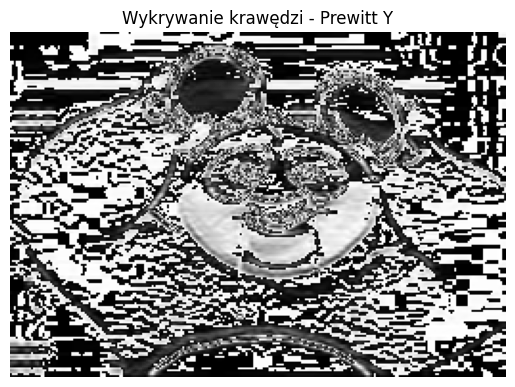

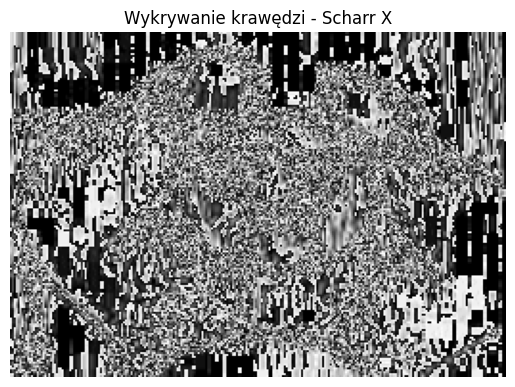

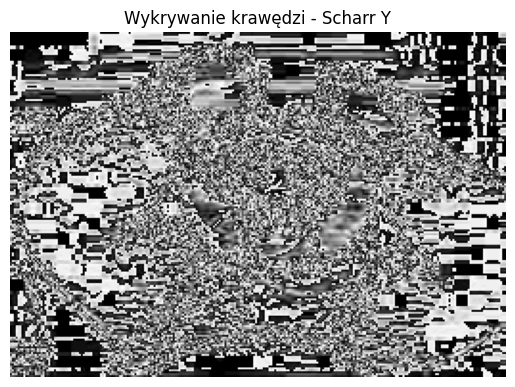

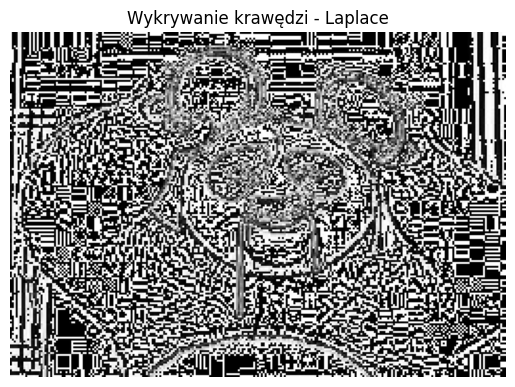

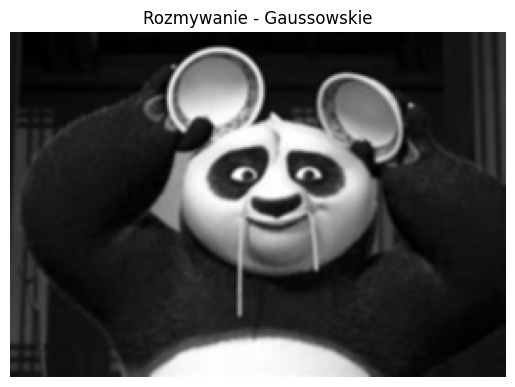

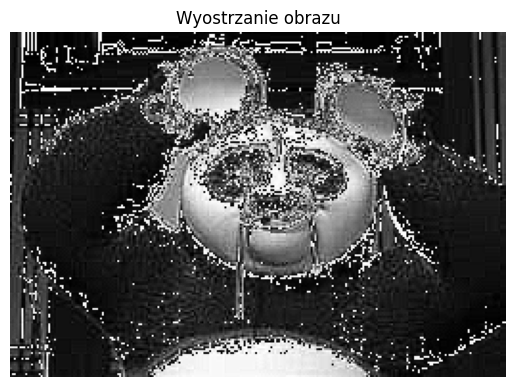

In [14]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def load_image(path):
    img = Image.open(path).convert("L")
    return np.array(img)

def show_image(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

scharr_x = np.array([[3, 0, -3],
                     [10, 0, -10],
                     [3, 0, -3]])

scharr_y = np.array([[3, 10, 3],
                     [0, 0, 0],
                     [-3, -10, -3]])

laplace = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

gaussian_blur = (1/16) * np.array([[1, 2, 1],
                                   [2, 4, 2],
                                   [1, 2, 1]])

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

def apply_convolution(image, kernel, title):
    result = convolve(image, kernel, mode='reflect')
    show_image(result, title)
    return result

def sobel_detector(image):
    sobel_x_result = convolve(image, sobel_x, mode='reflect')
    sobel_y_result = convolve(image, sobel_y, mode='reflect')
    sobel_combined = np.sqrt(sobel_x_result**2 + sobel_y_result**2)
    sobel_combined = (sobel_combined / np.max(sobel_combined) * 255).astype(np.uint8)
    show_image(sobel_combined, "Detektor Sobela - Suma X i Y")
    return sobel_combined

if __name__ == "__main__":
    image_path = "po.jpg"
    image = load_image(image_path)

    show_image(image, "Oryginalny obraz")

    sobel_x_result = apply_convolution(image, sobel_x, "Wykrywanie krawędzi - Sobel X")
    sobel_y_result = apply_convolution(image, sobel_y, "Wykrywanie krawędzi - Sobel Y")
    sobel_detector(image)

    prewitt_x_result = apply_convolution(image, prewitt_x, "Wykrywanie krawędzi - Prewitt X")
    prewitt_y_result = apply_convolution(image, prewitt_y, "Wykrywanie krawędzi - Prewitt Y")

    scharr_x_result = apply_convolution(image, scharr_x, "Wykrywanie krawędzi - Scharr X")
    scharr_y_result = apply_convolution(image, scharr_y, "Wykrywanie krawędzi - Scharr Y")

    laplace_result = apply_convolution(image, laplace, "Wykrywanie krawędzi - Laplace")

    gaussian_blur_result = apply_convolution(image, gaussian_blur, "Rozmywanie - Gaussowskie")

    sharpen_result = apply_convolution(image, sharpen, "Wyostrzanie obrazu")
